<a href="https://colab.research.google.com/github/q890003/ML_Fully-Bayesian/blob/master/ML_hw3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import product
#Fully Bayesian

n, a , b = 4, 1, 1          #for test
w = np.array([1,2,3,4]).reshape(n,1)   #for test
# n = int(input("n="))
# a = float(input("a="))    # the precisian of each y.       Note: precisian = 1/var.   suppose var in each x are the same.
# b = float(input("b="))    # the precisian of each weight.  Note: precisian = 1/var.   suppose var in each w are the same.
# w = np.array([float(i) for i in input("initial Weight.(1.combination of number and whitespace. 2.dim should be same as n.)").split()]).reshape(n,1)

#prior init
#suppose variance of var in each dim of w is the same -> in precision matrix, b = 1/sigma, are the same.
#precision matrix: We are interested in how concentrate are the value around mean rather than how spread they are.
prior_var = np.zeros((n,n), dtype=float)
for i in range(n):
    prior_var[i][i] = 1/b 
prior_mean = np.zeros((n,1), dtype=float)
#posterior init (no need)

#Training
#collecting
ten_x  , ten_y   = [], []
fifty_x, fifty_y = [], []
train_x, train_y = [], []
num = 0
while True:
    num += 1
    # y = X dot w + e, e~N(0,a). e is Gaussian noise.
    U = np.random.uniform(0,1)     
    V = np.random.uniform(0,1) 
    x_rand = np.random.uniform(-1,1)
    x = np.array([x_rand**i for i in range(0,n)]).reshape(1,n)
    x_t = x.reshape(n,1)
    e = (-2*math.log(U))**(-1/2) * math.cos(2*math.pi*V) * a**(1/2)
    y = x.dot(w) + e

    #posterior update
    S = np.linalg.inv(prior_var)
    posterior_var  = np.linalg.inv(a * x_t.dot(x) + S)
    posterior_mean = posterior_var.dot(a * x_t.dot(y).reshape(n,1) +  S.dot(prior_mean))

    #predictive distribution
    predictive_var  = 1/a + x.dot(posterior_var).dot(x_t)
    predictive_mean = x.dot(posterior_mean)
    
    #convergence check
    mean_convergence_check = np.absolute(posterior_mean - prior_mean)
    mean_convergence_check = np.all(np.less(mean_convergence_check,[0.0001]))
    var_convergence_check  = np.absolute(posterior_var - prior_var)
    var_convergence_check  = np.all(np.less(var_convergence_check ,[0.0001]))

    #prior update
    prior_var, prior_mean  = posterior_var, posterior_mean

    print("Add data point ({x:.5f},{y:.5f}):\n".format(x= x_rand, y= y.item()))
    print("Posterior mean:")
    for i in range(n):
        print("\t{mean:.10f}".format(mean= posterior_mean[i].item()))
        if i == n-1:
            print()
    print("Posterior variance:")
    for (i,j) in product(range(n),range(n)):
        print("\t{var:.10f}".format(var= posterior_var[i][j]), end='')
        if j < n-1:
            print(",", end='')
        else:
            print()
    print()
    print("Predictive distribution ~ N({mean:.10f}, {var:.10f})".format(mean= predictive_mean.item(), var= predictive_var.item()))
    print("--------------------------------------------------")

    train_x.append(x_rand)
    train_y.append(y[0])
    if num <= 10:
        ten_x.append(x_rand)
        ten_y.append(y[0])
    if num == 10:
        ten_mean = posterior_mean
        ten_var  = posterior_var
    if num <= 50 :
        fifty_x.append(x_rand)
        fifty_y.append(y)
    if num == 50:
        fifty_mean = posterior_mean
        fifty_var  = posterior_var
    if mean_convergence_check and var_convergence_check:
        break

Streaming output truncated to the last 5000 lines.
	0.0094038225,	0.0004431660,	-0.0158619162,	0.0003546126
	0.0004431660,	0.0627747377,	0.0025893761,	-0.0895081854
	-0.0158619162,	0.0025893761,	0.0461585550,	-0.0074017128
	0.0003546126,	-0.0895081854,	-0.0074017128,	0.1555804726

Predictive distribution ~ N(0.8476714616, 1.0096271294)
--------------------------------------------------
Add data point (0.06241,1.72394):

Posterior mean:
	0.7699821736
	0.9554499739
	2.9525937556
	5.5735754440

Posterior variance:
	0.0093168627,	0.0004027998,	-0.0157178556,	0.0004030846
	0.0004027998,	0.0627560000,	0.0026562481,	-0.0894856850
	-0.0157178556,	0.0026562481,	0.0459198992,	-0.0074820133
	0.0004030846,	-0.0894856850,	-0.0074820133,	0.1555534539

Predictive distribution ~ N(0.8424698986, 1.0094886064)
--------------------------------------------------
Add data point (-0.60507,-1.35868):

Posterior mean:
	0.7655157916
	0.9786486972
	2.9510110901
	5.5495789678

Posterior variance:
	0.0093065370,	

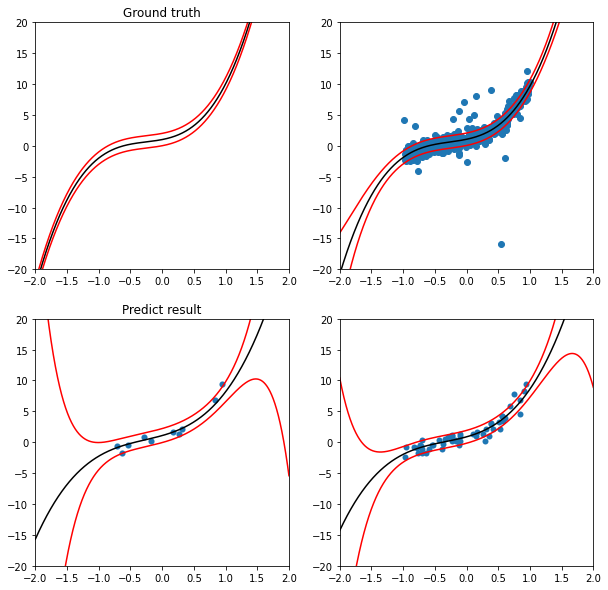

In [3]:
# 10000 linearly spaced numbers
test_num = 10000
x = np.linspace(-2,2,test_num)
y = np.zeros(test_num)

#fig1 Ground truth
plt.figure(figsize = [10,10])
axs1 = plt.subplot(2,2,1)
plt.axis([-2, 2, -20, 20])
axs1.title.set_text("Ground truth")
for i in range(n):
    y += w[i] * x**i
plt.plot(x,y,color = 'black')
plt.plot(x,y+a,color = 'red')
plt.plot(x,y-a,color = 'red')

#fig3 After 10 incomes
axs3 = plt.subplot(2,2,3)
axs3.title.set_text('After 10 incomes')
plt.axis([-2, 2, -20, 20])
y3      = np.zeros((test_num), dtype=float)
y3_up   = np.zeros((test_num), dtype=float)
y3_down = np.zeros((test_num), dtype=float)
for i in range(test_num):
    data_x     = np.array([x[i]**j for j in range(n)])
    data_var   = ( 1/a + data_x.dot(ten_var).dot(data_x.T) ).item()
    y3[i]      = data_x.dot(ten_mean) 
    y3_up[i]   = y3[i] + data_var
    y3_down[i] = y3[i] - data_var
plt.plot(x,y3,color = 'black')
plt.plot(x,y3_up,color = 'red')
plt.plot(x,y3_down,color = 'red')
plt.scatter(ten_x,ten_y,linewidths=0.1)

#fig4 After 50 incomes
axs2 = plt.subplot(2,2,4)
axs3.title.set_text('After 50 incomes')
plt.axis([-2, 2, -20, 20])
y4      = np.zeros((test_num), dtype=float)
y4_up   = np.zeros((test_num), dtype=float)
y4_down = np.zeros((test_num), dtype=float)
for i in range(test_num):
    data_x     = np.array([x[i]**j for j in range(n)])
    data_var   = (1/a + data_x.dot(fifty_var).dot(data_x.T)).item()
    y4[i]      = data_x.dot(fifty_mean) 
    y4_up[i]   = y4[i] + data_var
    y4_down[i] = y4[i] - data_var
plt.plot(x,y4,color = 'black')
plt.plot(x,y4_up,color = 'red')
plt.plot(x,y4_down,color = 'red')
plt.scatter(fifty_x,fifty_y,linewidths=0.001)

#fig2 Predict result
axs2 = plt.subplot(2,2,2)
axs3.title.set_text('Predict result')
plt.axis([-2, 2, -20, 20])
y2      = np.zeros((test_num), dtype=float)
y2_up   = np.zeros((test_num), dtype=float)
y2_down = np.zeros((test_num), dtype=float)
for i in range(test_num):
    data_x     = np.array([x[i]**j for j in range(n)])
    data_var   = (1/a + data_x.dot(posterior_var).dot(data_x.T)).item()
    y2[i]      = data_x.dot(posterior_mean) 
    y2_up[i]   = y2[i] + data_var
    y2_down[i] = y2[i] - data_var
plt.plot(x,y2,color = 'black')
plt.plot(x,y2_up,color = 'red')
plt.plot(x,y2_down,color = 'red')
plt.scatter(train_x,train_y,linewidths=1)